## Analiza brezposelnosti in prostih delovnih mest v Sloveniji

Naložimo podatke. Tip podatkov = px. To storimo z pomočjo knjižnice pyaxis. Za sam projekt, bomo uporabljali še pandas in matplotlib, zato importamo še ta dva. Podatke potem obdelamo z pyaxis.parse in podamo še encoding. Utf-8 ni delal, latin1 ni primeren za naše podatke, zato sem se na koncu odločil za cp1250. 

In [3]:
from pyaxis import pyaxis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# nalozimo podatke
parsed = pyaxis.parse('podatki/brezaposleneCetrtletno.PX', encoding='cp1250') 
df = parsed['DATA']

Multilingual PX file


Za prikaz razlik med nezaposlenostjo moških in žensk potrebujemo prvo ustrezne podatke. Izberemo regijo Slovenija, skupno starostno skupino, meritev v procentih in spol. Podatke dobimo razdeljene glede na četrtine let podane v formatu 2008Q1 naprimer. Iz tega razloga jih potem pretvorimo v berljivo obliko z PeriodIndex. Za vsak slučaj se prepričamo, da nimamo string podatkov in na koncu izrišemo graf. 

In [ ]:
parsed2 = pyaxis.parse('podatki/vsi.px', encoding='cp1250')
df2 = parsed2['DATA']

df2_unemployment = df2[
    (df2['KOHEZIJSKA REGIJA'] == "SLOVENIJA") &
    (df2["STAROSTNA SKUPINA"] == "Starostna skupina - SKUPAJ") &
    (df2["MERITVE"] == "Stopnja brezposelnosti (v %)") &
    (df2["SPOL"].isin(['Moški', 'Ženske']))
].copy()

df2_unemployment['ČETRTLETJE'] = pd.PeriodIndex(df2_unemployment['ČETRTLETJE'], freq='Q').to_timestamp()
df2_unemployment['DATA'] = pd.to_numeric(df2_unemployment['DATA'], errors='coerce')

pivot = df2_unemployment.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')


pivot.plot(title='Unemployment Rate by Gender in Slovenia', figsize=(10, 5))
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

Multilingual PX file


Dobljeni rezulati, se zdijo smiselni glede na krizo, ki se je zgodila okoli leta 2010 in manjša porast brezposelnosti
okoli leta 2020 - 2022 sklepam, da zaradi covida. 

In [ ]:
df.columns

Index(['KOHEZIJSKA REGIJA', 'BREZPOSELNE OSEBE', 'SPOL', 'MERITVE',
       'ČETRTLETJE', 'DATA'],
      dtype='object')

Povprečno število brezposelnih med leti 2008-2024 v Zahodni Sloveniji (mera: število v 1000): 
SPOL
Spol - SKUPAJ    27.367647
dtype: float64
Povprečno število brezposelnih med leti 2008-2024 v Vzhodni Sloveniji (mera: število v 1000): 
SPOL
Spol - SKUPAJ    38.044118
dtype: float64


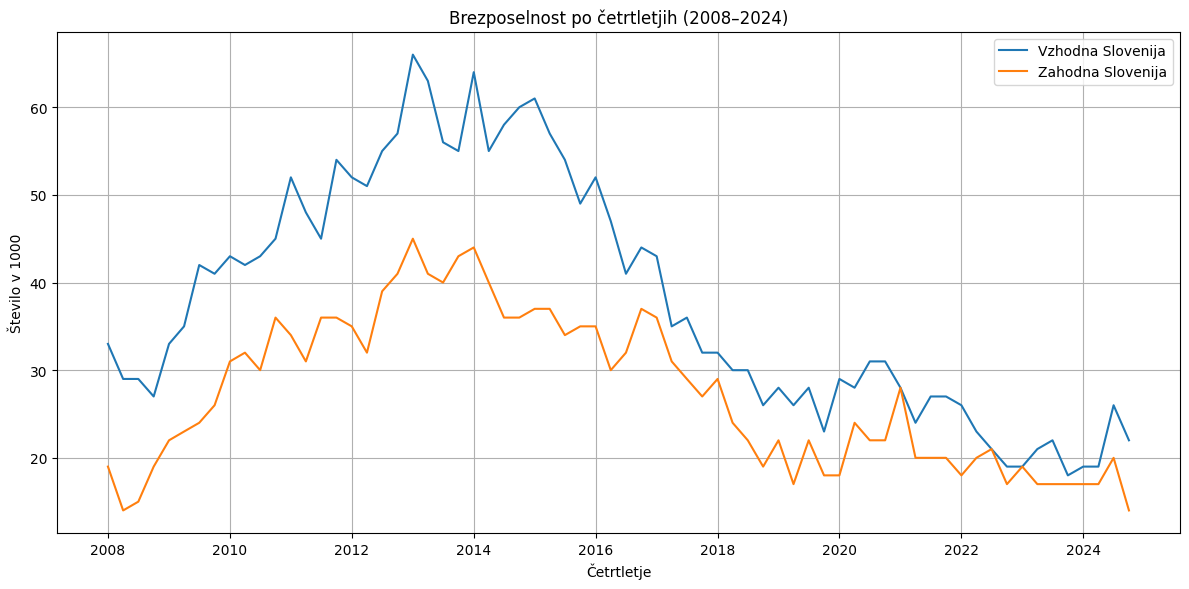

In [ ]:
df_vzhod = df[
        (df['KOHEZIJSKA REGIJA'] == 'Vzhodna Slovenija') &
        (df['BREZPOSELNE OSEBE'] == 'Brezposelni - SKUPAJ') &
        (df['MERITVE'] == 'Število v 1000') &
        (df['SPOL'] == 'Spol - SKUPAJ')

].copy()

df_vzhod['ČETRTLETJE'] = pd.PeriodIndex(df_vzhod['ČETRTLETJE'], freq='Q').to_timestamp()
df_vzhod['DATA'] = pd.to_numeric(df_vzhod['DATA'], errors='coerce')
pivot_vzhod = df_vzhod.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')



df_zahod = df[
        (df['KOHEZIJSKA REGIJA'] == 'Zahodna Slovenija') &
        (df['BREZPOSELNE OSEBE'] == 'Brezposelni - SKUPAJ') &
        (df['MERITVE'] == 'Število v 1000') &
        (df['SPOL'] == 'Spol - SKUPAJ')
].copy()

df_zahod['ČETRTLETJE'] = pd.PeriodIndex(df_zahod['ČETRTLETJE'], freq='Q').to_timestamp()
df_zahod['DATA'] = pd.to_numeric(df_zahod['DATA'], errors='coerce')
pivot_zahod = df_zahod.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')

print("Povprečno število brezposelnih med leti 2008-2024 v Zahodni Sloveniji (mera: število v 1000): ")
print(pivot_zahod.mean())

print("Povprečno število brezposelnih med leti 2008-2024 v Vzhodni Sloveniji (mera: število v 1000): ")
print(pivot_vzhod.mean())

plt.figure(figsize=(12, 6))
plt.plot(pivot_vzhod.index, pivot_vzhod, label='Vzhodna Slovenija')
plt.plot(pivot_zahod.index, pivot_zahod, label='Zahodna Slovenija')
plt.title('Brezposelnost po četrtletjih (2008–2024)')
plt.ylabel('Število v 1000')
plt.xlabel('Četrtletje')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 


Sedaj bi si pogledali še število prostih mest v teh obdobjih. Je število prostih delovnih mest skladno z ravnjo brezposelnosti ? Kje je kje ni ? 

In [ ]:
# nalozimo podatke
parsed_delovnamesta = pyaxis.parse('delovnaMestaCetrtletno.PX', encoding='cp1250') 
delovna_df = parsed_delovnamesta['DATA']

Multilingual PX file


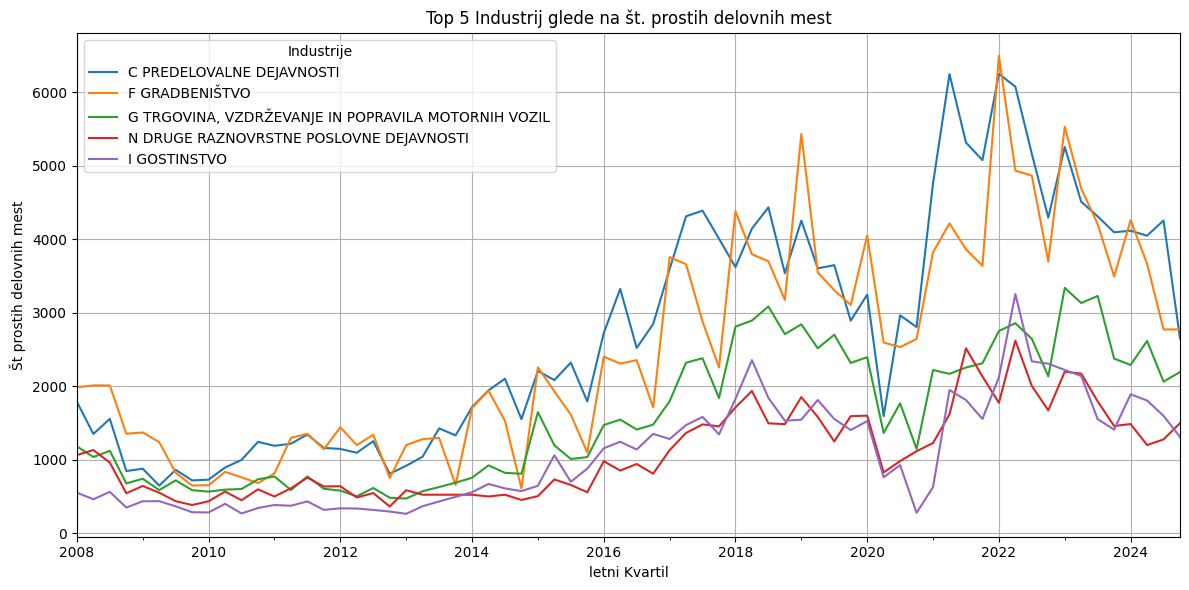

In [ ]:
vac_by_industry = delovna_df[
    (delovna_df["MERITVE"] == "Število prostih delovnih mest  - SKUPAJ") &
    (delovna_df["SKD DEJAVNOST"] != "SKD Dejavnost - SKUPAJ [B do S]")
].copy()

vac_by_industry['ČETRTLETJE'] = pd.PeriodIndex(vac_by_industry['ČETRTLETJE'], freq='Q').to_timestamp()

vac_by_industry["DATA"] = pd.to_numeric(vac_by_industry["DATA"], errors="coerce")

vacancy_pivot = vac_by_industry.pivot_table(
    index="ČETRTLETJE",
    columns="SKD DEJAVNOST",
    values="DATA"
)
#vacancy_pivot
top_industries = vacancy_pivot.mean().sort_values(ascending=False).head(5).index

vacancy_pivot[top_industries].plot(figsize=(12,6), title="Top 5 Industrij glede na št. prostih delovnih mest")
plt.ylabel("Št prostih delovnih mest")
plt.xlabel("letni Kvartil")
plt.grid(True)
plt.legend(title="Industrije")
plt.tight_layout()
plt.show()
